2025.05.12, Zhang Chao

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import scipy
sys.path.append('/home/climate/chaoz/code/utils/')
from plot_utils import plot_settings


In [2]:
os.chdir('/home/climate/chaoz/project/03Irr_Ts_CN/processed/')
dLST_N10 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020.nc').sel(time=slice('2010','2010'))
dLST_N15 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020_N15.nc').sel(time=slice('2010','2010'))
dLST_N20 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020_N20.nc').sel(time=slice('2010','2010'))
dLST_N25 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020_N25.nc').sel(time=slice('2010','2010'))
dLST_E100 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020.nc').sel(time=slice('2010','2010'))
dLST_E60 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020_E60.nc').sel(time=slice('2010','2010'))
dLST_E80 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020_E80.nc').sel(time=slice('2010','2010'))
dLST_E120 = xr.open_dataset('delta_LSTday_Yr_CN_2001_2020_E120.nc').sel(time=slice('2010','2010'))

In [3]:
ds_N = xr.merge([dLST_N10.squeeze('time').rename({'Ts': 'N10'}).N10,
                 dLST_N15.squeeze('time').rename({'Ts': 'N15'}).N15,
                 dLST_N20.squeeze('time').rename({'Ts': 'N20'}).N20,
                 dLST_N25.squeeze('time').rename({'Ts': 'N25'}).N25])
ds_E = xr.merge([dLST_E100.squeeze('time').rename({'Ts': 'E100'}).E100,
                 dLST_E120.squeeze('time').rename({'Ts': 'E120'}).E120,
                 dLST_E60.squeeze('time').rename({'Ts': 'E60'}).E60,
                 dLST_E80.squeeze('time').rename({'Ts': 'E80'}).E80])

df_N = ds_N.to_dataframe().reset_index().dropna().drop(columns=['time','lat','lon'])
df_E = ds_E.to_dataframe().reset_index().dropna().drop(columns=['time','lat','lon'])

In [4]:
def getSigFlag(p):
    """Get the significance sign (star)

    Args:
        p (float32): p-value

    Returns:
        str: significance sign
    """
    strSig = ''
    if p<0.05:
        strSig = '**'
    elif p<0.1:
        strSig = '*'
    else:
        strSig = ''
    return strSig


def plot_curves(ax,x,y,xlabel,ylabel):
    ax.scatter(x,y,color='grey',alpha=0.3,s=0.8)
    parameter = np.polyfit(x, y, 1)
    f = np.poly1d(parameter)
    r, sig = scipy.stats.pearsonr(x, y)
    newx=np.linspace(np.min(x),np.max(x),20)
    ax.plot(newx, f(newx), ls='--', c='k')
    ax.text(0.10,0.80, "slope = %.2f\nR$^{2}$=%.2f$^{%s}$" %
             (parameter[0],r*r,getSigFlag(sig)),
             transform=ax.transAxes, c= 'k',fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax


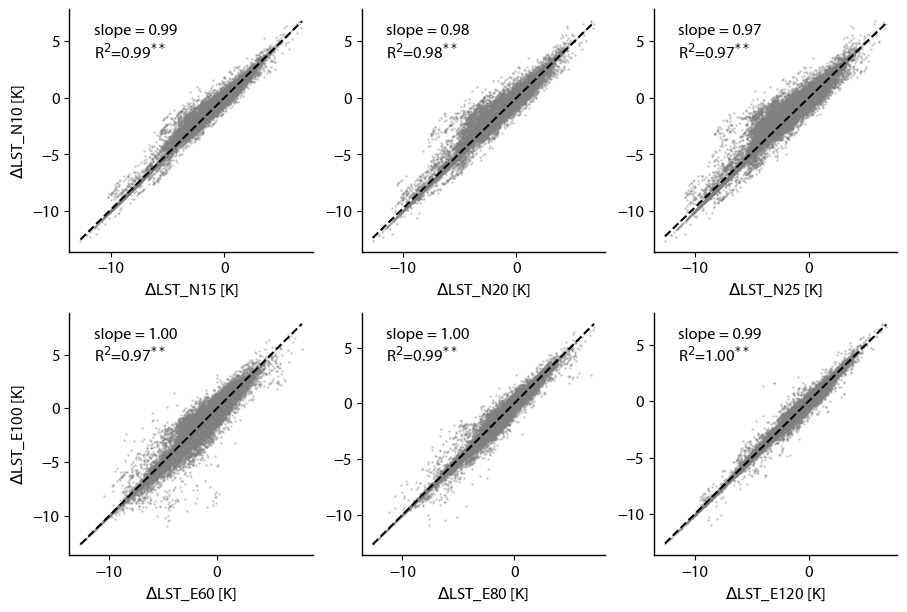

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(9,6),sharex=False)
plot_settings()
fig.subplots_adjust(left = 0.07, right = 0.99,
                    bottom = 0.08, top = 0.99,
                    wspace= 0.2, hspace=0.25)
plot_curves(axes[0,0],df_N['N15'],df_N['N10']  ,'$\Delta$LST_N15 [K]','$\Delta$LST_N10 [K]')
plot_curves(axes[0,1],df_N['N20'],df_N['N10']  ,'$\Delta$LST_N20 [K]','')
plot_curves(axes[0,2],df_N['N25'],df_N['N10']  ,'$\Delta$LST_N25 [K]','')
plot_curves(axes[1,0],df_E['E60'],df_E['E100'] ,'$\Delta$LST_E60 [K]','$\Delta$LST_E100 [K]')
plot_curves(axes[1,1],df_E['E80'],df_E['E100'] ,'$\Delta$LST_E80 [K]','')
plot_curves(axes[1,2],df_E['E120'],df_E['E100'],'$\Delta$LST_E120 [K]','')

plt.savefig('../figures/Figure_S14.png',dpi=300)